# Today's Date - 28 Jne 2023
# Topic - Mini Project : Cat vs Dog Classifier


Dataset used : https://www.kaggle.com/datasets/salader/dogs-vs-cats

We will directly download from Kaggle and upload our data here, through some lines of code

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 23.8MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.4MB/s]


Its imported in ZIP format, so we need to unzip it

In [9]:
import zipfile

zip_path = '/content/dogs-vs-cats.zip'  # Replace with the actual path to your zip file

# Extract the contents of the zip file to the current directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')


# Import necessary libraries

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

import matplotlib.pyplot as plt

In [11]:
# Generators : Instead of loading all the images into our X_train and X_test, because that will shoot up our RAM, we will give it in batches

train = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256) #all images will be reshaped into this size
)

validation = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256) #all images will be reshaped into this size
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


All the images stored here, was in numpy array

In [12]:
print(type(train))
print(train)

<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [13]:
for images, labels in train:
    print('First image in the batch:')
    print(images[0])  # Print the first image in the batch

    print('First label in the batch:')
    print(labels[0])  # Print the first label in the batch

    break  # Print only the first batch for demonstration purposes


First image in the batch:
tf.Tensor(
[[[1.70000000e+02 1.80000000e+02 1.79000000e+02]
  [2.14623047e+02 2.25289062e+02 2.22291016e+02]
  [2.39216797e+02 2.49330078e+02 2.45773438e+02]
  ...
  [8.53710938e+00 1.65371094e+01 1.95371094e+01]
  [2.33593750e+00 1.03359375e+01 1.30019531e+01]
  [5.00000000e+00 1.30000000e+01 1.50000000e+01]]

 [[1.70378906e+02 1.80000000e+02 1.79000000e+02]
  [2.13740173e+02 2.23774918e+02 2.21029236e+02]
  [2.38205139e+02 2.47896606e+02 2.44214890e+02]
  ...
  [8.50158691e+00 1.65015869e+01 1.95015869e+01]
  [3.46969604e+00 1.14696960e+01 1.41357117e+01]
  [3.10546875e+00 1.11054688e+01 1.31054688e+01]]

 [[1.70964844e+02 1.80000000e+02 1.79000000e+02]
  [2.12374878e+02 2.21433456e+02 2.19078003e+02]
  [2.36640747e+02 2.45679871e+02 2.41804764e+02]
  ...
  [8.44665527e+00 1.64466553e+01 1.94466553e+01]
  [5.22293091e+00 1.32229309e+01 1.58889465e+01]
  [1.75781250e-01 8.17578125e+00 1.01757812e+01]]

 ...

 [[1.91929688e+02 1.95929688e+02 1.94929688e+02]
  

In [14]:
# All the values in numpy array has range of 0 to 255 (each pixel has 0 to 255 brightness range)

# So, we need to normalize
def process (image,label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train = train.map(process)
validation = validation.map(process)

Now lets make our CNN architecture

In [15]:
model = Sequential()

#Layer 1
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

#Layer 2
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

#Layer 3
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

#Layer 4
model.add(Dense(128, activation='relu'))

#Layer 5
model.add(Dense(64, activation='relu'))

#Layer 6 (output layer)
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train, epochs=10, validation_data=validation, verbose=1)

Epoch 1/10
625/625 [==============================] - 70s 85ms/step - loss: 0.6079 - accuracy: 0.6554 - val_loss: 0.5143 - val_accuracy: 0.7554
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4915 - accuracy: 0.7610 - val_loss: 0.4648 - val_accuracy: 0.7822
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4069 - accuracy: 0.8139 - val_loss: 0.4557 - val_accuracy: 0.7914
Epoch 4/10
625/625 [==============================] - 56s 89ms/step - loss: 0.3122 - accuracy: 0.8632 - val_loss: 0.5685 - val_accuracy: 0.7880
Epoch 5/10
625/625 [==============================] - 58s 92ms/step - loss: 0.1991 - accuracy: 0.9192 - val_loss: 0.7170 - val_accuracy: 0.7844
Epoch 6/10
625/625 [==============================] - 54s 85ms/step - loss: 0.1092 - accuracy: 0.9599 - val_loss: 0.8351 - val_accuracy: 0.7906
Epoch 7/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0853 - accuracy: 0.9709 - val_loss: 0.9416 - val_accurac

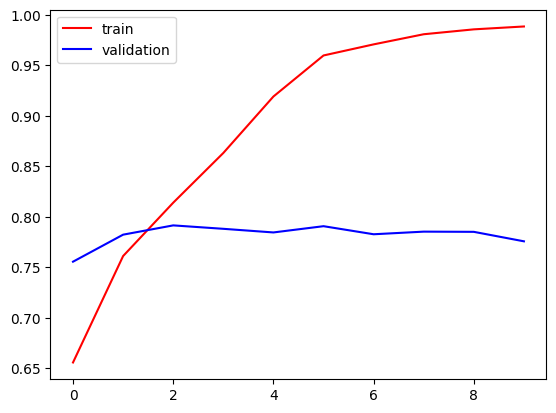

In [18]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

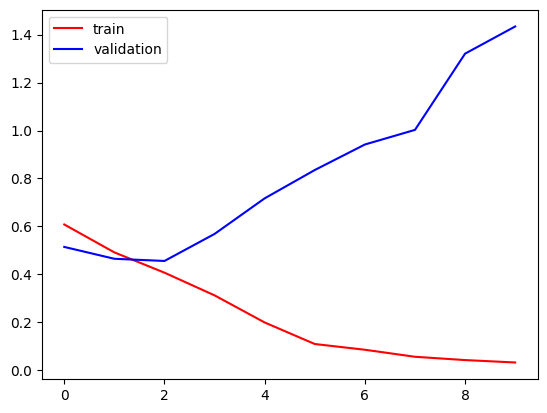

In [19]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

## So as you can judge, its overfitting

ways to reduce overfitting<br>
1. add more data <bR>
2. data augmentation <br>
3. l1 l2 regulaizer <br>
4. dropout <br>
5. batch norm <br>
6. reduce complexity <br>

# Lets try using batch norm and dropout to reduce overfitting

In [23]:
from keras.layers import BatchNormalization, Dropout

In [24]:
model2 = Sequential()

#Layer 1
model2.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

#Layer 2
model2.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

#Layer 3
model2.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model2.add(Flatten())

#Layer 4
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.1))

#Layer 5
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.1))

#Layer 6 (output layer)
model2.add(Dense(1, activation='sigmoid'))

In [25]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [26]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model2.fit(train, epochs=10, validation_data=validation, verbose=1)

Epoch 1/10
625/625 [==============================] - 73s 110ms/step - loss: 1.4770 - accuracy: 0.5725 - val_loss: 0.6822 - val_accuracy: 0.6172
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6238 - accuracy: 0.6454 - val_loss: 0.6034 - val_accuracy: 0.6434
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5341 - accuracy: 0.7157 - val_loss: 0.5437 - val_accuracy: 0.7010
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4689 - accuracy: 0.7592 - val_loss: 0.4431 - val_accuracy: 0.7920
Epoch 5/10
625/625 [==============================] - 80s 126ms/step - loss: 0.4149 - accuracy: 0.7964 - val_loss: 0.4409 - val_accuracy: 0.7868
Epoch 6/10
625/625 [==============================] - 71s 114ms/step - loss: 0.3609 - accuracy: 0.8248 - val_loss: 0.4581 - val_accuracy: 0.7614
Epoch 7/10
625/625 [==============================] - 82s 130ms/step - loss: 0.3020 - accuracy: 0.8583 - val_loss: 0.4248 - val_ac

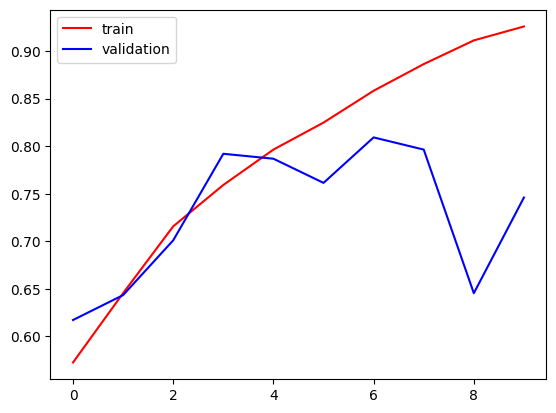

In [27]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

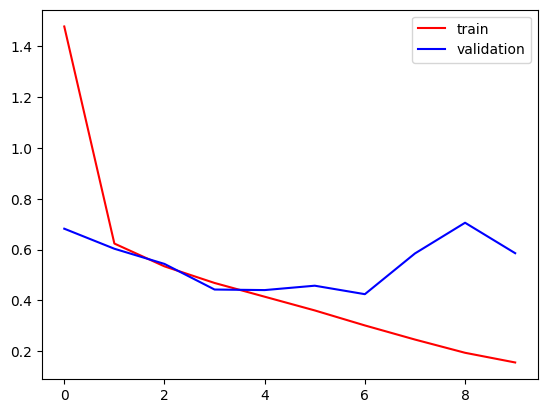

In [28]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

Might have to tweak some more things to get the best model
now head on to testing

# Now lets try to test our model

In [32]:
pip install opencv-python

In [33]:
import cv2

In [34]:
test_img1 = cv2.imread('/content/1.jpg')
test_img2 = cv2.imread('/content/2.jpg')
test_img3 = cv2.imread('/content/3.jpg')
test_img4 = cv2.imread('/content/4.jpg')

In [35]:
# Chaging dimensions of our test images
print(test_img1.shape)
print(test_img2.shape)
print(test_img3.shape)
print(test_img4.shape)

input1 = cv2.resize(test_img1, (256,256))
input2 = cv2.resize(test_img2, (256,256))
input3 = cv2.resize(test_img3, (256,256))
input4 = cv2.resize(test_img4, (256,256))

input1 = input1.reshape((1,256,256,3))
input2 = input2.reshape((1,256,256,3))
input3 = input3.reshape((1,256,256,3))
input4 = input4.reshape((1,256,256,3))

(4624, 2608, 3)
(3256, 1836, 3)
(3009, 1472, 3)
(408, 612, 3)


# Lets generalize this

In [84]:
def answer(input_image):
  plt.imshow(input_image)
  pic = cv2.resize(input_image, (256,256))
  img = pic.reshape((1,256,256,3))
  preds = model.predict(img)
  ans = int(preds)
  print(preds)
  if ans:
    print("It's a dog")
  else:
    print("It's a cat")

1/1 [==============================] - 0s 29ms/step
[[1.]]
It's a dog


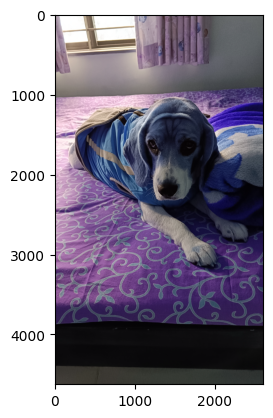

In [85]:
answer(test_img1)

1/1 [==============================] - 0s 19ms/step
[[1.]]
It's a dog


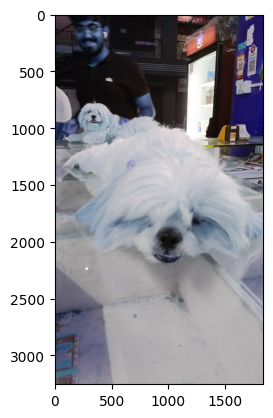

In [86]:
answer(test_img2)

1/1 [==============================] - 0s 21ms/step
[[0.]]
It's a cat


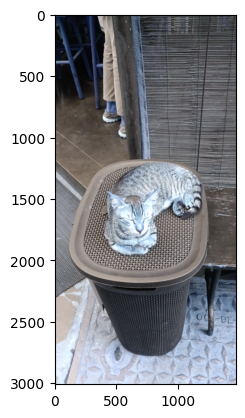

In [87]:
answer(test_img3)

1/1 [==============================] - 0s 18ms/step
[[1.]]
It's a dog


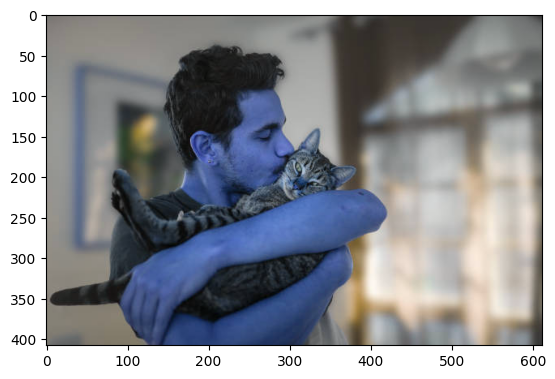

In [88]:
answer(test_img4)

1/1 [==============================] - 0s 19ms/step
[[1.]]
It's a dog


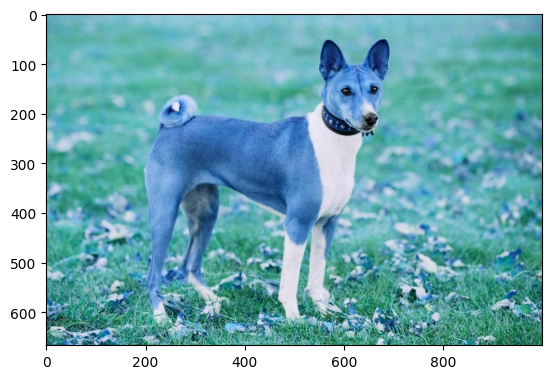

In [89]:
test_img5 = cv2.imread('/content/5.jpg')
answer(test_img5)

1/1 [==============================] - 0s 28ms/step
[[0.]]
It's a cat


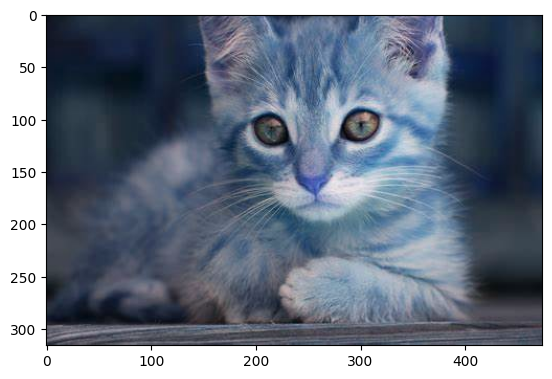

In [90]:
test_img6 = cv2.imread('/content/6.jpeg')
answer(test_img6)